In [1]:
import matplotlib.pyplot as plt
import torch

from cheetah import ParticleBeam

In [2]:
tensor_kwargs = dict(dtype=torch.float32)

In [3]:
n_runs = 10
dim = 6
n_samples = 10000

cov = torch.diag(torch.tensor((1, 1, 9, 9, 1, 1), **tensor_kwargs)) * 1e-6
mean = torch.zeros(dim, **tensor_kwargs)
mvnorm = torch.distributions.MultivariateNormal(mean, covariance_matrix=cov)
coords = mvnorm.sample((n_runs, n_samples))
coords = torch.cat((coords, torch.ones(n_runs, n_samples, 1, **tensor_kwargs)), dim=-1)

coords.shape

torch.Size([10, 10000, 7])

In [4]:
beam_ensemble = ParticleBeam(
    particles=coords, energy=torch.tensor(40.0e6, **tensor_kwargs)
)
beam_ensemble.particles.shape

torch.Size([10, 10000, 7])

In [5]:
beam_ensemble.particles.shape

torch.Size([10, 10000, 7])

In [6]:
beam_ensemble.x.shape

torch.Size([10, 10000])

<Axes: xlabel='$x$ (mm)'>

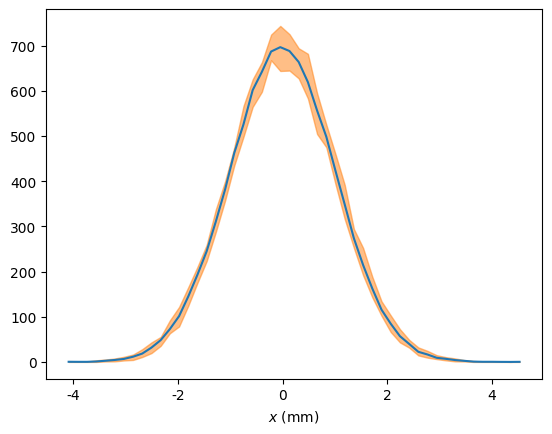

In [7]:
beam_ensemble.plot_1d_distribution(dimension="x", bins=50)

<Axes: xlabel='$x$ (mm)', ylabel='$y$ (mm)'>

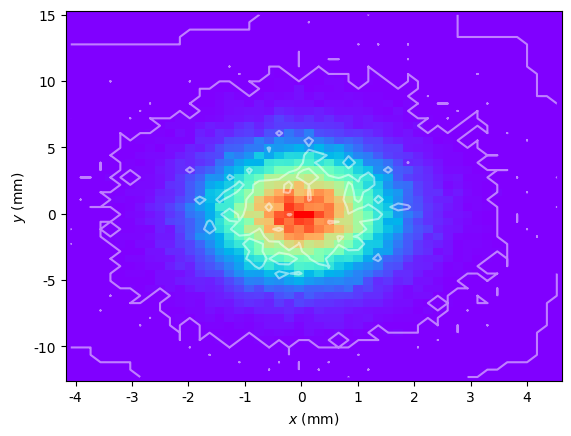

In [8]:
beam_ensemble.plot_2d_distribution(
    x_dimension="x",
    y_dimension="y",
    bins=(50, 50),
    errorbar=("pi", 90),
    confidence_contours=(2,),
    # histogram_smoothing=10.0,
    contour_smoothing=1.0,
    # style="contour",
)

(<Figure size 1200x1200 with 36 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='$p_x$'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='$y$ (mm)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: ylabel='$p_y$'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='$\\tau$ (mm)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: xlabel='$x$ (mm)', ylabel='$\\delta$'>,
         <Axes: xlabel='$p_x$'>, <Axes: xlabel='$y$ (mm)'>,
         <Axes: xlabel='$p_y$'>, <Axes: xlabel='$\\tau$ (mm)'>,
         <Axes: xlabel='$\\delta$'>]], dtype=object))

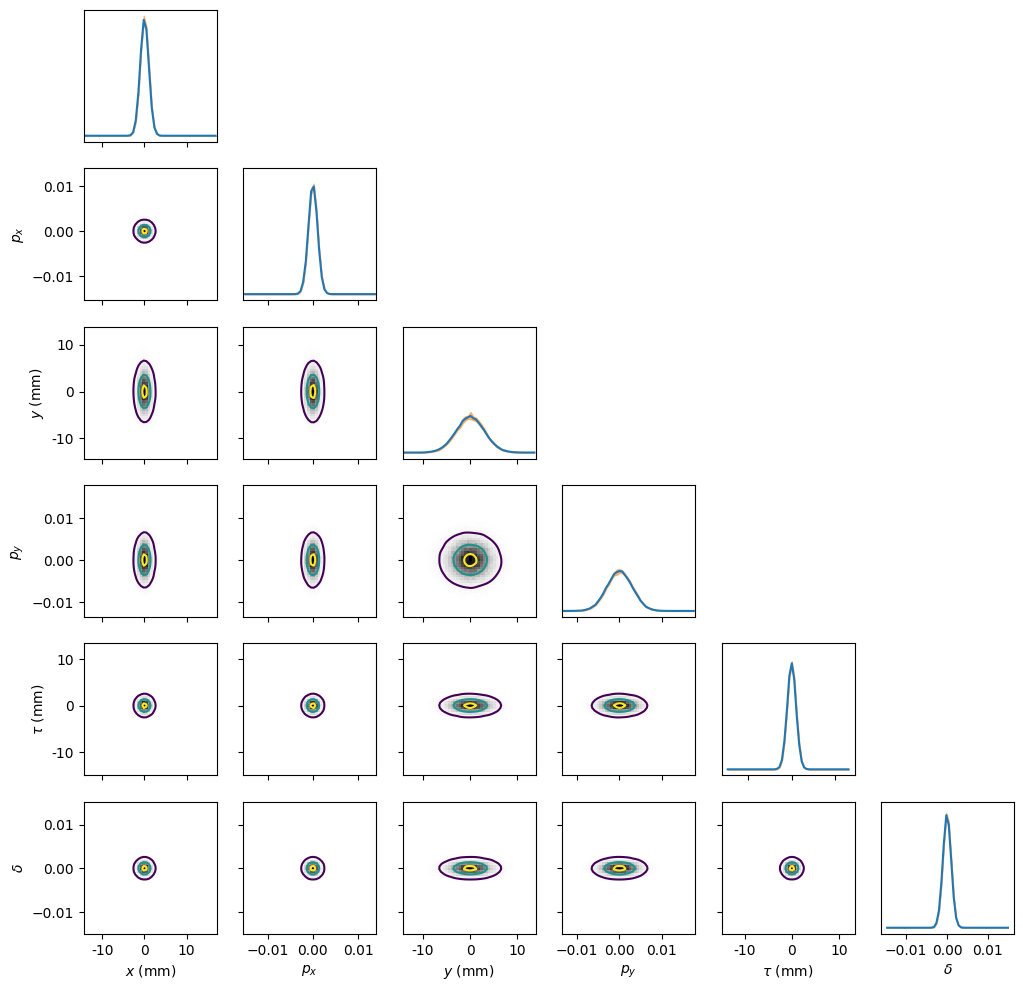

In [9]:
beam_ensemble.plot_distribution(bins=50, plot_2d_kws={"style": "contour"})

(<Figure size 1200x1200 with 36 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='$p_x$'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='$y$ (mm)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: ylabel='$p_y$'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='$\\tau$ (mm)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: xlabel='$x$ (mm)', ylabel='$\\delta$'>,
         <Axes: xlabel='$p_x$'>, <Axes: xlabel='$y$ (mm)'>,
         <Axes: xlabel='$p_y$'>, <Axes: xlabel='$\\tau$ (mm)'>,
         <Axes: xlabel='$\\delta$'>]], dtype=object))

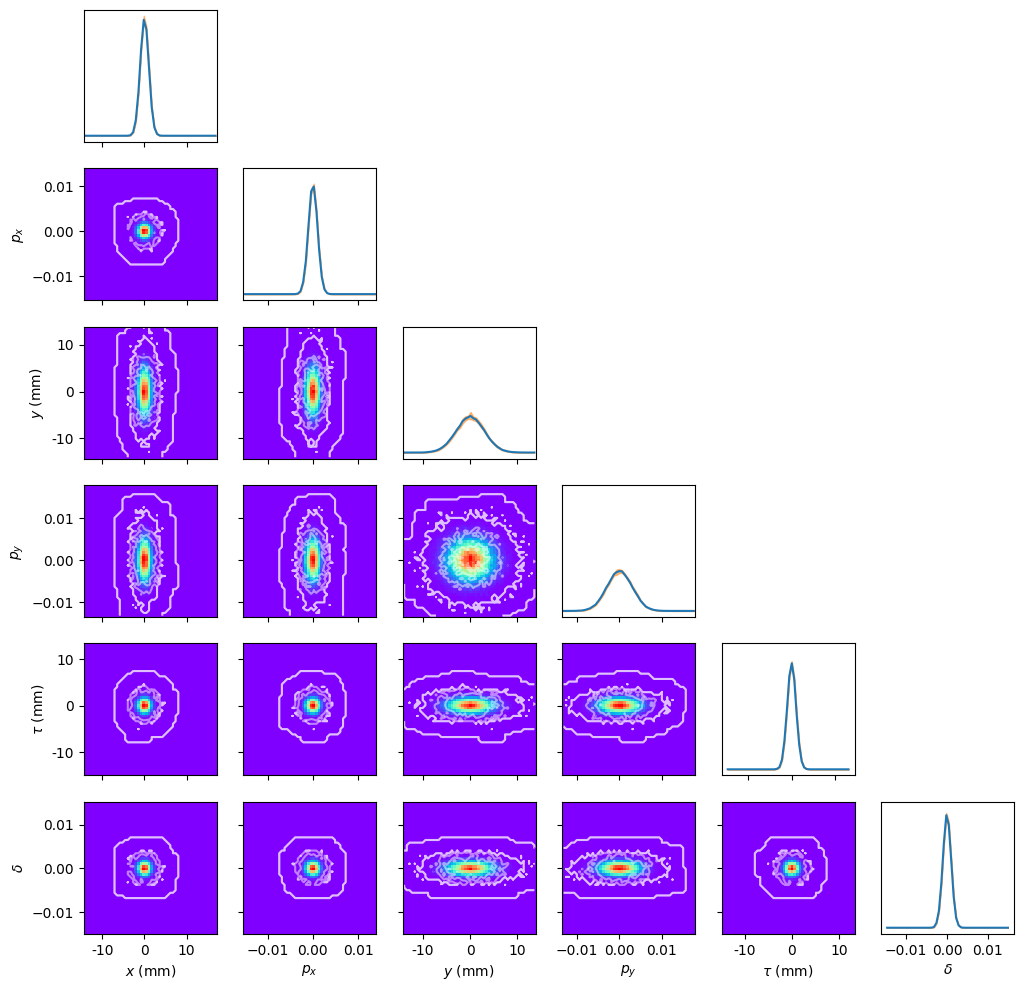

In [10]:
beam_ensemble.plot_distribution(
    bins=50, plot_2d_kws=dict(style="histogram", confidence_contours=(1, 2))
)